# Python Module

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import warnings
# print option
torch.set_printoptions(precision=1, linewidth=50000)
# Control Warning Message
warnings.filterwarnings(action='ignore')

# Data

In [2]:
datasetDir = '~/project/dataset'
trainData = datasets.MNIST(root=datasetDir, train=True,  download=True, transform=ToTensor())
testData  = datasets.MNIST(root=datasetDir, train=False, download=True, transform=ToTensor())

In [3]:
trainData

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/woong/project/dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
print('[Print] Type of trainData :', type(trainData))
print('[Print] Type of trainData.data :', type(trainData.data))
print('[Print] Type of trainData.classes :',type(trainData.classes))

[Print] Type of trainData : <class 'torchvision.datasets.mnist.MNIST'>
[Print] Type of trainData.data : <class 'torch.Tensor'>
[Print] Type of trainData.classes : <class 'list'>


In [5]:
print(trainData.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [6]:
print(trainData.data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 2

In [7]:
print(trainData.train_labels[0])

tensor(5)


In [8]:
# Difference between trainData and trainData.data
# Difference between trainData is nomalized value of trainData.data
print(trainData[0])

(tensor([[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.7, 0.1, 0.7, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.6, 0.7, 1.0, 1.0, 1.0, 1.0

In [9]:
# [0][0]: 3D-image data [0][1]: Label
print(trainData[0][0].size())
print(trainData[0][1])

torch.Size([1, 28, 28])
5


In [10]:
# trainData is nomalized using /255
torch.set_printoptions(precision=16)
print(trainData.data[0][24][4])
print(trainData.data[0][24][4]/255)
print(trainData[0][0][0][24][4])
torch.set_printoptions(precision=1)

tensor(136, dtype=torch.uint8)
tensor(0.5333333611488342)
tensor(0.5333333611488342)


# Data Loader

In [11]:
batchSize = 100

trainDataLoader = DataLoader(trainData, batch_size=batchSize)
testDataLoader  = DataLoader(testData,  batch_size=batchSize)

for imgs, labs in trainDataLoader:
	print("Shape of img [N, C, H, W]: ", imgs.shape)
	print("Shape of lab: ", labs.shape, labs.dtype)
	break

Shape of img [N, C, H, W]:  torch.Size([100, 1, 28, 28])
Shape of lab:  torch.Size([100]) torch.int64


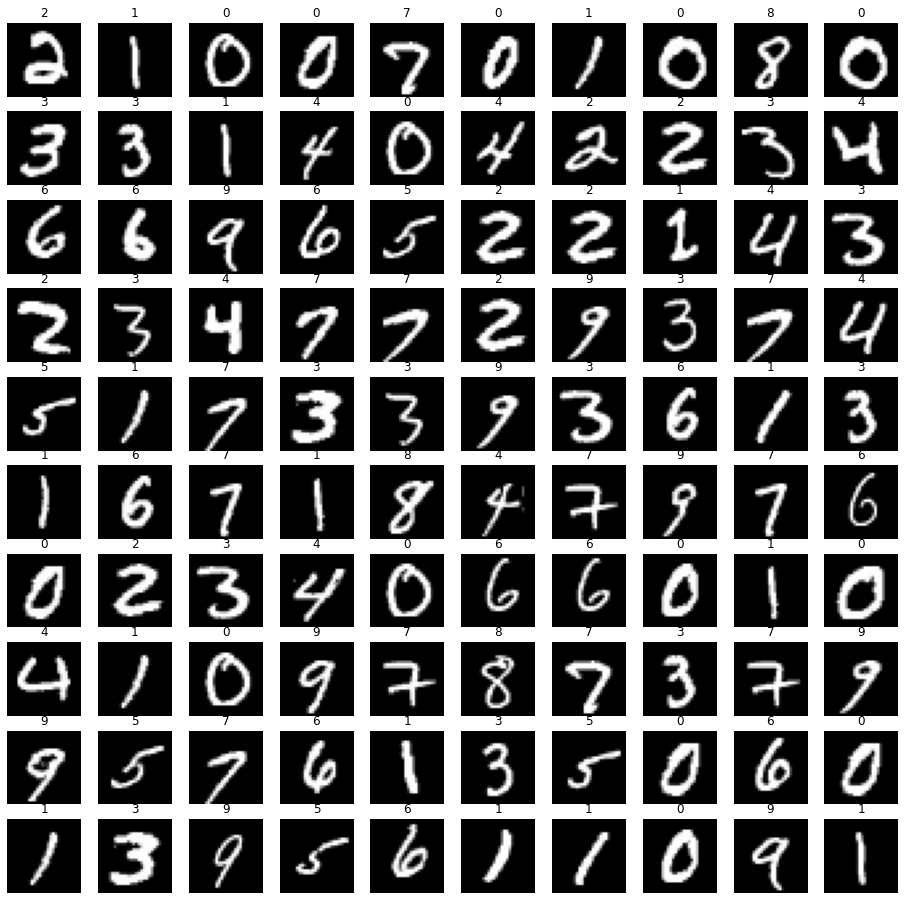

In [25]:
figure = plt.figure(figsize=(16, 16))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
	sampleIndex = torch.randint(len(imgs), size=(1,)).item()
	img = imgs[sampleIndex]
	lab = labs[sampleIndex].item()
	figure.add_subplot(rows, cols, i)
	plt.title(lab)
	plt.axis("off")
	plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Model Build-up

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class NN(nn.Module):
	def __init__(self):
		super(NN, self).__init__()
		self.flatten = nn.Flatten()
		self.seq = nn.Sequential(
			nn.Linear(28*28, 30),
			nn.ReLU(),
			nn.Linear(30, 30),
			nn.ReLU(),
			nn.Linear(30, 10),
			nn.ReLU(),
			nn.Linear(10, 10),
			nn.ReLU()
		)

	def forward(self, x):
		x = self.flatten(x)
		logits = self.seq(x)
		return logits

model = NN().to(device)
print(model)

Using cuda device
NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
  )
)


# Define Loss Function & Optimizer

In [14]:
for name, param in model.named_parameters(): 
	print(f'name:{name}') 
	print(type(param)) 
	print(f'param.shape:{param.shape}') 
	print(f'param.requries_grad:{param.requires_grad}') 
	print('=====')

name:seq.0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([30, 784])
param.requries_grad:True
=====
name:seq.0.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([30])
param.requries_grad:True
=====
name:seq.2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([30, 30])
param.requries_grad:True
=====
name:seq.2.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([30])
param.requries_grad:True
=====
name:seq.4.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10, 30])
param.requries_grad:True
=====
name:seq.4.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10])
param.requries_grad:True
=====
name:seq.6.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10, 10])
param.requries_grad:True
=====
name:seq.6.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10])
param.requries_grad:True
=====


In [15]:
lossFunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [16]:
def train(trainDataLoader, model, lossFunc, optimizer):
	size = len(trainDataLoader.dataset)
	for batchIndex, (img, lab) in enumerate(trainDataLoader):
		img, lab = img.to(device), lab.to(device)
		pred = model(img)
		loss = lossFunc(pred, lab)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		if batchIndex % 1000 == 0:
			loss, current = loss.item(), batchIndex * len(img)
			print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")		

In [17]:
def test(testDataLoader, model):
	size = len(testDataLoader.dataset)
	model.eval()
	testLoss, correct = 0, 0
	with torch.no_grad():
		for img, lab in testDataLoader:
			img, lab = img.to(device), lab.to(device)
			pred = model(img)
			testLoss += lossFunc(pred, lab).item()
			correct += (pred.argmax(1) == lab).type(torch.float).sum().item()
	testLoss /= size
	correct /= size
	print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {testLoss:>8f} \n")

In [18]:
dictParams = model.state_dict()
dictParams.keys()

odict_keys(['seq.0.weight', 'seq.0.bias', 'seq.2.weight', 'seq.2.bias', 'seq.4.weight', 'seq.4.bias', 'seq.6.weight', 'seq.6.bias'])

In [19]:
dictParams[list(dictParams.keys())[0]]

tensor([[ 1.5e-02, -3.1e-02,  3.5e-02,  ...,  2.1e-02,  2.0e-02,  1.4e-02],
        [ 1.3e-02, -1.4e-02, -3.3e-02,  ..., -1.8e-02, -2.0e-02,  1.9e-02],
        [-2.2e-02,  2.2e-02, -7.0e-03,  ..., -1.8e-03,  1.5e-02,  3.1e-02],
        ...,
        [-7.2e-03, -4.2e-03,  2.2e-03,  ...,  1.5e-02,  1.1e-02,  2.2e-02],
        [-3.5e-02, -5.8e-03, -8.8e-03,  ...,  3.2e-02,  2.2e-02,  1.3e-03],
        [-8.1e-05, -2.3e-02, -2.1e-02,  ...,  2.3e-02,  8.5e-03,  7.5e-03]], device='cuda:0')

In [20]:
dictParams[list(dictParams.keys())[0]].size()

torch.Size([30, 784])

In [21]:
dictParams[list(dictParams.keys())[0]][0][0]=0.3
dictParams[list(dictParams.keys())[0]]

tensor([[ 3.0e-01, -3.1e-02,  3.5e-02,  ...,  2.1e-02,  2.0e-02,  1.4e-02],
        [ 1.3e-02, -1.4e-02, -3.3e-02,  ..., -1.8e-02, -2.0e-02,  1.9e-02],
        [-2.2e-02,  2.2e-02, -7.0e-03,  ..., -1.8e-03,  1.5e-02,  3.1e-02],
        ...,
        [-7.2e-03, -4.2e-03,  2.2e-03,  ...,  1.5e-02,  1.1e-02,  2.2e-02],
        [-3.5e-02, -5.8e-03, -8.8e-03,  ...,  3.2e-02,  2.2e-02,  1.3e-03],
        [-8.1e-05, -2.3e-02, -2.1e-02,  ...,  2.3e-02,  8.5e-03,  7.5e-03]], device='cuda:0')

In [22]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(trainDataLoader, model, lossFunc, optimizer)
    test(testDataLoader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.295056  [    0/60000]
Test Error: 
 Accuracy: 11.3%, Avg loss: 0.023054 

Epoch 2
-------------------------------
loss: 2.294205  [    0/60000]
Test Error: 
 Accuracy: 11.3%, Avg loss: 0.023041 

Epoch 3
-------------------------------
loss: 2.293541  [    0/60000]
Test Error: 
 Accuracy: 11.3%, Avg loss: 0.023030 

Epoch 4
-------------------------------
loss: 2.292978  [    0/60000]
Test Error: 
 Accuracy: 11.3%, Avg loss: 0.023019 

Epoch 5
-------------------------------
loss: 2.292470  [    0/60000]
Test Error: 
 Accuracy: 11.3%, Avg loss: 0.023010 

Epoch 6
-------------------------------
loss: 2.291978  [    0/60000]
Test Error: 
 Accuracy: 11.3%, Avg loss: 0.023001 

Epoch 7
-------------------------------
loss: 2.291471  [    0/60000]
Test Error: 
 Accuracy: 11.3%, Avg loss: 0.022992 

Epoch 8
-------------------------------
loss: 2.290936  [    0/60000]
Test Error: 
 Accuracy: 11.3%, Avg loss: 0.022983 

Epoch 9
----------------

In [23]:
dictParams[list(dictParams.keys())[0]]

tensor([[ 3.0e-01, -3.1e-02,  3.5e-02,  ...,  2.1e-02,  2.0e-02,  1.4e-02],
        [ 1.3e-02, -1.4e-02, -3.3e-02,  ..., -1.8e-02, -2.0e-02,  1.9e-02],
        [-2.2e-02,  2.2e-02, -7.0e-03,  ..., -1.8e-03,  1.5e-02,  3.1e-02],
        ...,
        [-7.2e-03, -4.2e-03,  2.2e-03,  ...,  1.5e-02,  1.1e-02,  2.2e-02],
        [-3.5e-02, -5.8e-03, -8.8e-03,  ...,  3.2e-02,  2.2e-02,  1.3e-03],
        [-8.1e-05, -2.3e-02, -2.1e-02,  ...,  2.3e-02,  8.5e-03,  7.5e-03]], device='cuda:0')

In [24]:
torch.save(model.state_dict(), "model.pth")